In [2]:
import pandas as pd

# Charger le CSV
df = pd.read_csv("data/dataset_selection.csv")

# Aperçu du dataset
print("Aperçu du dataset :")
print(df.head())

print("\nInformations générales :")
print(df.info())


Aperçu du dataset :
                                                path     label
0  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
1  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
2  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
3  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome
4  E:\mémoire\Memoire\data\glaucome\ACRIMA\ACRIMA...  glaucome

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9547 non-null   object
 1   label   9547 non-null   object
dtypes: object(2)
memory usage: 149.3+ KB
None


In [3]:
print(f"Nombre total d'images : {len(df)}")
print(f"Nombre de colonnes : {df.shape[1]}")


Nombre total d'images : 9547
Nombre de colonnes : 2


In [ ]:
# Compter le nombre d'images par label
class_counts = df['label'].value_counts()

print("\nRépartition des labels :")
print(class_counts)

# Pourcentage par label
class_percent = df['label'].value_counts(normalize=True) * 100
print("\nPourcentage par label :")
print(class_percent.round(2))



Répartition des labels :
label
glaucome    2517
diabete     2500
normaux     2484
mda         2046
Name: count, dtype: int64

Pourcentage par label :
label
glaucome    26.36
diabete     26.19
normaux     26.02
mda         21.43
Name: proportion, dtype: float64


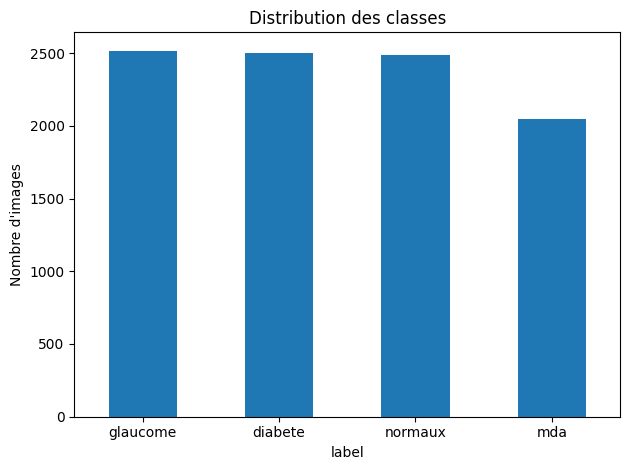

In [ ]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.title("Distribution des labels")
plt.xlabel("label")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [10]:
for classe in df['label'].unique():
    print(f"\nExemples pour la classe '{classe}' :")
    print(df[df['label'] == classe]['path'].head(3).tolist())



Exemples pour la classe 'glaucome' :
['E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im310_g_ACRIMA.jpg', 'E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im311_g_ACRIMA.jpg', 'E:\\mémoire\\Memoire\\data\\glaucome\\ACRIMA\\ACRIMA\\NOT PARTITIONED\\glaucoma\\Im312_g_ACRIMA.jpg']

Exemples pour la classe 'mda' :
['E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Dataset\\train\\amd\\1012.jpg', 'E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\\AMDNet23 Dataset\\train\\amd\\1013.jpg', 'E:\\mémoire\\Memoire\\data\\mda\\AMDNet23 Fundus Image Dataset for  Age-Related Macular Degeneration Disease Detection\

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

df_valid, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['label'],
    random_state=42
)


print("Tailles des splits :")
print(f"Train : {len(df_train)}")
print(f"Validation : {len(df_valid)}")
print(f"Test : {len(df_test)}")


Tailles des splits :
Train : 7637
Validation : 955
Test : 955


In [16]:
def show_distribution(name, data):
    print(f"\n{name}")
    print(data['label'].value_counts(normalize=True).round(3))

show_distribution("Train", df_train)
show_distribution("Validation", df_valid)
show_distribution("Test", df_test)



Train
label
glaucome    0.264
diabete     0.262
normaux     0.260
mda         0.214
Name: proportion, dtype: float64

Validation
label
glaucome    0.264
diabete     0.262
normaux     0.261
mda         0.214
Name: proportion, dtype: float64

Test
label
glaucome    0.264
diabete     0.262
normaux     0.260
mda         0.215
Name: proportion, dtype: float64
